In [1]:
import pandas as pd

In [2]:
from collections import Counter

In [3]:
pwd

'C:\\Users\\Dell\\Documents\\Jupyter Notebooks'

In [4]:
# Read the CSV file using pandas
df = pd.read_csv("C:/Users/Dell/Documents/Jupyter Notebooks/BC_Transaction.csv")

In [5]:
df.head()

,A,blockNum,txHash,gas limit,gas price,from,to,data,value,tx type,used gas,status
0,0,0x1042864,0xde9a608704ab9bbdc50e2686dbab7e5a5ffe76946c73...,21000,45.651805,0x043022ef9fca1066024d19d681e2ccf44ff90de3,0xf4826e0892195796fae28d8f362ca294704d89c1,0x,1.235000e+18,financial,21000,1
1,1,0x1042864,0x55a1c163c0900c82c01c1d7bd1ad26251fecc6492883...,21000,32.570537,0x82d03f4bae63b03b4da9f45d812dd519610616b7,0x82d03f4bae63b03b4da9f45d812dd519610616b7,0x,3.368850e+15,financial,21000,1
2,2,0x1042864,0x1ea3a9c021d1070bbb304a640bb038f99fa3b68aa613...,21000,32.570537,0xb4ce76ac0e0b278b5047d3ed0cbcdaab9c84e6bd,0xb0ba83044740818d5691b691be7f93affc221bdb,0x,2.186940e+16,financial,21000,1
3,3,0x1042864,0x35c51f095757079f5a8d95d725540b8ee4a6bc8bef1a...,126164,24.507473,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,0x6b75d8af000000e20b7a7ddf000ba900b4009a80,0x642f1b498c00e1ccc2afff80f6cc6144eaeb95c46cc3...,4.426607e+07,contract,88315,1
4,4,0x1042864,0x55d38abdef2a23dc112735b96c526087ca2c0e6c68d5...,218432,24.607473,0xb20eeb6ef659b0da5ecc3403182db2129a43f615,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x3593564c000000000000000000000000000000000000...,7.533000e+18,contract,135536,1


In [6]:
df.describe()

,A,gas limit,gas price,value,used gas,status
count,554937.000000,5.549370e+05,554937.000000,5.549370e+05,5.549370e+05,554937.000000
mean,22513.018406,2.427629e+05,34.608674,1.357480e+18,9.650337e+04,0.967002
std,13924.891821,1.048954e+06,82.217851,7.381528e+19,3.608412e+05,0.178632
min,0.000000,2.100000e+04,19.239521,0.000000e+00,2.100000e+04,0.000000
25%,10160.000000,2.330000e+04,24.886246,0.000000e+00,2.100000e+04,1.000000
50%,21929.000000,8.827100e+04,28.094253,0.000000e+00,4.690000e+04,1.000000
75%,34541.000000,2.071280e+05,34.679342,3.901540e+16,1.087670e+05,1.000000
max,50611.000000,3.000000e+07,21152.820090,2.291820e+22,2.549085e+07,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554937 entries, 0 to 554936
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   A          554937 non-null  int64  
 1   blockNum   554937 non-null  object 
 2   txHash     554937 non-null  object 
 3   gas limit  554937 non-null  int64  
 4   gas price  554937 non-null  float64
 5   from       554937 non-null  object 
 6   to         554554 non-null  object 
 7   data       554937 non-null  object 
 8   value      554937 non-null  float64
 9   tx type    554937 non-null  object 
 10  used gas   554937 non-null  int64  
 11  status     554937 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 50.8+ MB


In [8]:
#number of missing values
df.isnull().sum()

A              0
blockNum       0
txHash         0
gas limit      0
gas price      0
from           0
to           383
data           0
value          0
tx type        0
used gas       0
status         0
dtype: int64

In [9]:
#there are missing values in to column . 

In [10]:
#Number of unique values in each column
df.nunique()

A             50612
blockNum       3548
txHash       554937
gas limit     86367
gas price    109169
from         222184
to           116604
data         273304
value        142670
tx type           2
used gas      93990
status            2
dtype: int64

In [11]:
# Explore value counts of categorical columns
df['tx type'].value_counts()

tx type
contract     368506
financial    186431
Name: count, dtype: int64

In [12]:
print(df.columns)

Index(['A', 'blockNum', 'txHash', 'gas limit', 'gas price', 'from', 'to',
       'data', 'value', 'tx type', 'used gas', 'status'],
      dtype='object')


In [13]:
# Explore value counts of 'status' column
df['status'].value_counts()

status
1    536625
0     18312
Name: count, dtype: int64

In [14]:
#highest transaction from address if any 
df['from'].value_counts().head()

from
0x46340b20830761efd32832a74d7169b29feb9758    4630
0x21a31ee1afc51d94c2efccaa2092ad1028285549    4426
0x28c6c06298d514db089934071355e5743bf21d60    4128
0xdfd5293d8e347dfe59e90efd55b2956a1343963d    4120
0xf89d7b9c864f589bbf53a82105107622b35eaa40    3625
Name: count, dtype: int64

all addresses are unique so no two transaction from same address

In [15]:
#total count
df.shape[0]

554937

In [16]:
print(sorted(Counter(df['status']).items()))

[(0, 18312), (1, 536625)]


In [17]:
trans1 = df[df['status']==1]
trans0 = df[df['status']==0]

In [18]:
print(trans1.shape,trans0.shape,df.shape)

(536625, 12) (18312, 12) (554937, 12)


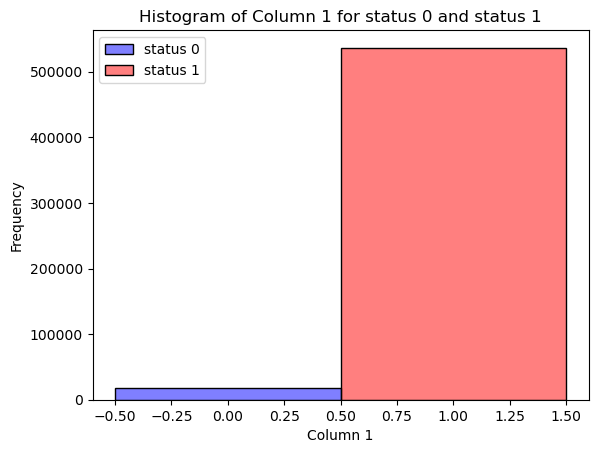

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histograms for numerical columns in trans0 and trans1
sns.histplot(trans0['status'], color='blue', alpha=0.5, label='status 0')
sns.histplot(trans1['status'], color='red', alpha=0.5, label='status 1')
plt.legend()
plt.xlabel('Column 1')
plt.ylabel('Frequency')
plt.title('Histogram of Column 1 for status 0 and status 1')
plt.show()

In [20]:
X=df
Y=df['status']

In [21]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Dell\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex


In [23]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
X.drop('status',axis=1, inplace=True)

In [25]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 536625), (1, 536625)] (1073250,)


In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=0)
X_resampled,y_resampled = rus.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 18312), (1, 18312)] (36624,)


In [29]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming X and Y are already defined and preprocessed
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, Y)

print(f"Original dataset shape: {Counter(Y)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({1: 536625, 0: 18312})
Resampled dataset shape: Counter({1: 536625, 0: 536625})


In [32]:
###DATA SPLIT

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (858600, 11), y_train shape: (858600,)
X_test shape: (214650, 11), y_test shape: (214650,)


test_size=0.2 specifies that 20% of the data will be used for testing, and the rest (80%) for training.
random_state=42 ensures reproducibility.

In [43]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_columns = ['tx type', 'status']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform on training data
X_train_encoded = encoder.fit_transform(X_train[categorical_column])

# Transform test data using the fitted encoder
X_test_encoded = encoder.transform(X_test[categorical_column])



In [47]:
import pandas as pd
import numpy as np

# Assuming X_train and X_test are DataFrames with both categorical and numerical features
numerical_columns = ['A', 'blockNum', 'gas limit', 'gas price', 'value', 'used gas']

# Example of creating some dummy DataFrames (you should replace these with your actual data)
X_train_encoded = pd.DataFrame(np.random.randint(0, 2, size=(len(X_train), len(categorical_columns))), columns=categorical_columns)
X_test_encoded = pd.DataFrame(np.random.randint(0, 2, size=(len(X_test), len(categorical_columns))), columns=categorical_columns)
X_train = pd.DataFrame(np.random.randn(len(X_train), len(numerical_columns)), columns=numerical_columns)
X_test = pd.DataFrame(np.random.randn(len(X_test), len(numerical_columns)), columns=numerical_columns)

# Concatenate encoded categorical features and numerical features
X_train = pd.concat([X_train_encoded, X_train[numerical_columns]], axis=1)
X_test = pd.concat([X_test_encoded, X_test[numerical_columns]], axis=1)



In [48]:
## handling missing values and replacing them with mean 

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [49]:
## feature scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [50]:
##model training : logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Example model

# Assuming y_train and y_test are your target variables
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [58]:
## model evaluation

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.498914511996273
              precision    recall  f1-score   support

           0       0.50      0.46      0.48    107474
           1       0.50      0.54      0.52    107176

    accuracy                           0.50    214650
   macro avg       0.50      0.50      0.50    214650
weighted avg       0.50      0.50      0.50    214650

[[49599 57875]
 [49683 57493]]


In [55]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Train the model
decision_tree.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=0)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = decision_tree.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50    107474
           1       0.50      0.50      0.50    107176

    accuracy                           0.50    214650
   macro avg       0.50      0.50      0.50    214650
weighted avg       0.50      0.50      0.50    214650


Confusion Matrix:
[[53823 53651]
 [53590 53586]]


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest = RandomForestClassifier(random_state=0)

# Train the model
random_forest.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=0)

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = random_forest.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51    107474
           1       0.50      0.47      0.49    107176

    accuracy                           0.50    214650
   macro avg       0.50      0.50      0.50    214650
weighted avg       0.50      0.50      0.50    214650


Confusion Matrix:
[[56792 50682]
 [56551 50625]]


In [63]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train_scaled, y_train)


GaussianNB()

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = naive_bayes.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50    107474
           1       0.50      0.50      0.50    107176

    accuracy                           0.50    214650
   macro avg       0.50      0.50      0.50    214650
weighted avg       0.50      0.50      0.50    214650


Confusion Matrix:
[[52969 54505]
 [53101 54075]]


In [ ]:
#correlation matrix
numericdf.corr()

There is a weak negative correlation (-0.039695) between the 'status' column and the 'A' column. This suggests that there might be a very slight tendency for the 'status' to decrease as the 'A' value increases, but the correlation is weak.

There is a weak positive correlation (0.003133) between the 'status' column and the 'gas limit' column. This suggests a very slight tendency for the 'status' to increase as the 'gas limit' increases, but again, the correlation is weak.

There is a weak negative correlation (-0.032240) between the 'status' column and the 'gas price' column. This suggests a very slight tendency for the 'status' to decrease as the 'gas price' increases, but the correlation is weak.

There is virtually no correlation between the 'status' column and the 'value' column or the 'used gas' column. The correlation coefficients are very close to zero (0.002720 and -0.005533, respectively), indicating no meaningful linear relationship between these variables.

Overall, based on the correlation coefficients, there are only very weak correlations between the 'status' column and other numerical columns in the dataset. This suggests that the 'status' column may not be strongly influenced by the other numerical variables, or there may be non-linear relationships or other factors at play.